In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load the dataset (replace the path with your actual dataset path)
df1 = pd.read_excel("C:\\Users\\mouni\\Downloads\\archive (1)\\Telco_customer_churn.xlsx")
df1.to_csv("C:\\Users\\mouni\\Downloads\\Telco_customer_churn.csv", index=False)
df = pd.read_csv("C:\\Users\\mouni\\Downloads\\Telco_customer_churn.csv")
print(df.head())

   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Tota

In [3]:
# Separate numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Fill missing values with the mean for numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
# Separate non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# Fill missing values with the mode for non-numeric columns
for col in non_numeric_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


# Convert categorical variables to numerical ones (One-Hot Encoding)
df = pd.get_dummies(df, drop_first=True)

C:\Users\mouni\AppData\Local\Temp\ipykernel_6924\830622356.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


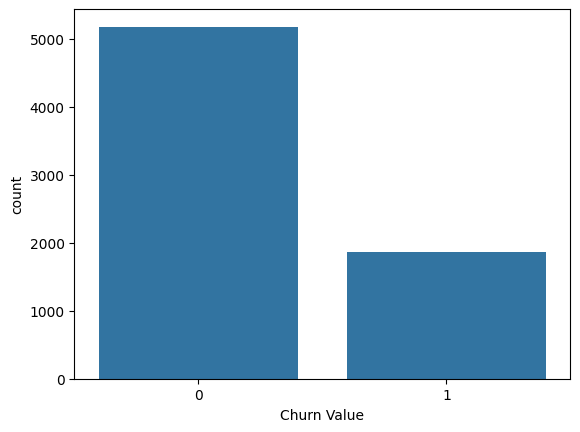

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable (Churn)
sns.countplot(x='Churn Value', data=df)
plt.show()
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Define the target variable and features
X = df.drop('Churn Value', axis=1)  # Features
y = df['Churn Value']  # Target variable

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["Stay", "Churn"], yticklabels=["Stay", "Churn"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import joblib

# Save the trained model
joblib.dump(rf, 'churn_prediction_model.pkl')

# Load the model (for deployment or testing)
rf_loaded = joblib.load('churn_prediction_model.pkl')

